Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30    

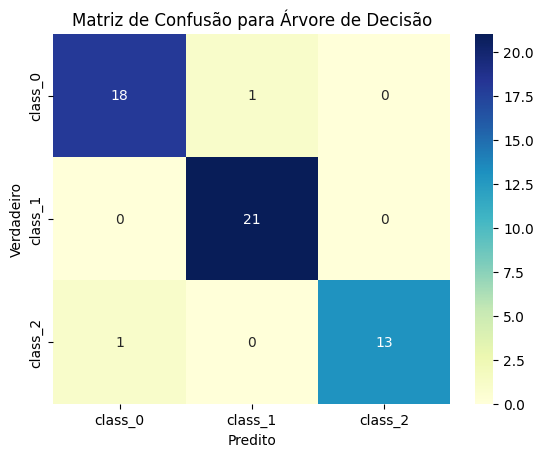

Modelo: Random Forest
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00
Relatório de Classificação:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



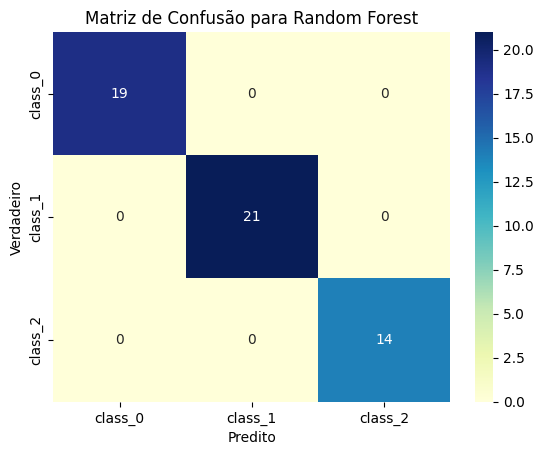

Modelo: K-Nearest Neighbors
Acurácia: 0.96
Precisão: 0.97
Recall: 0.96
F1-Score: 0.96
Relatório de Classificação:
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



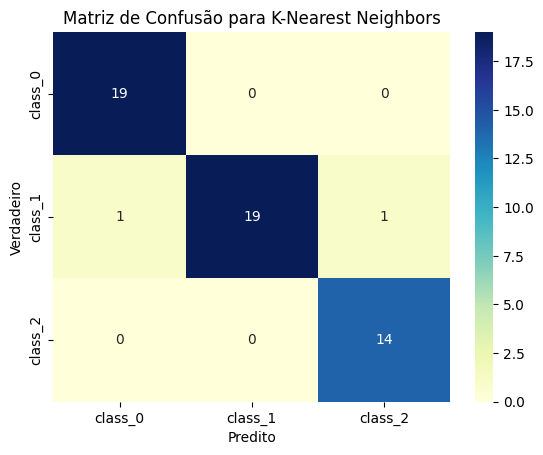

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar e explorar o dataset Wine
data = load_wine()
X = data.data
y = data.target

# Exibindo as primeiras linhas das features e a distribuição das classes
print("Features:", data.feature_names)
print("Classes:", data.target_names)
print(pd.DataFrame(X, columns=data.feature_names).head())
print("Distribuição das classes:", np.bincount(y))

# Dividir o conjunto de dados em treino e teste (70% para treino e 30% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Função para treinar e avaliar o modelo
def train_and_evaluate_model(model, model_name):
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Previsões
    y_pred = model.predict(X_test)

    # Avaliação das métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Impressão dos resultados
    print(f"Modelo: {model_name}")
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred, target_names=data.target_names))

    # Plot da Matriz de Confusão
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title(f"Matriz de Confusão para {model_name}")
    plt.show()

# Modelos a serem treinados
models = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Avaliando cada modelo
for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)
